In [4]:
import h5py
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams["figure.figsize"] = [16,9]
sns.set_style('whitegrid')

GRID_SIZE = 0.06
LOWER_LAMBDA = 6472.5
UPPER_LAMBDA = 6740
PLOT_MASK = range(1475,1550)

In [3]:
hf_spec = h5py.File("/home/praveen/Documents/Research Data/resampled_emission_spectra.h5", "r")
hf_grid = h5py.File("/home/praveen/Documents/Research Data/wl_grid.h5", "r")

wl_grid = np.array(hf_grid["wl_grid"])
df = pd.DataFrame(hf_spec["spectra"])

In [5]:
hf_spec.close()
hf_grid.close()

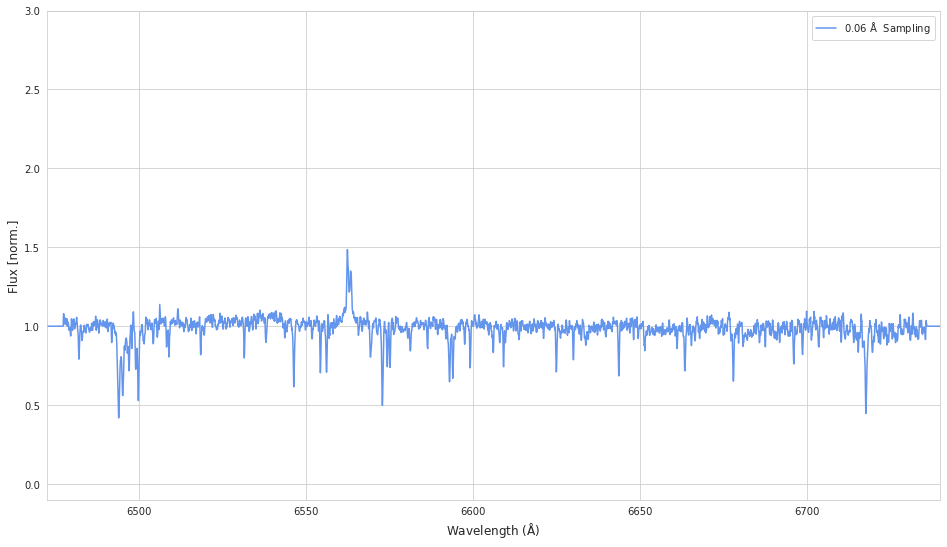

In [6]:
f, ax = plt.subplots(figsize=(16,9))
ax.plot(wl_grid, df.loc[69,:], color="cornflowerblue", lw=1.5, label=str(GRID_SIZE)+" $\mathrm{\AA}\ $ Sampling")
ax.set_xlabel("Wavelength ($\mathrm{\AA}$)", size=12)
ax.set_ylabel("Flux [norm.]", size=12)
ax.set_ylim(-0.1,3.0)
ax.set_xlim(wl_grid.min(), wl_grid.max() )
ax.legend()
plt.show()

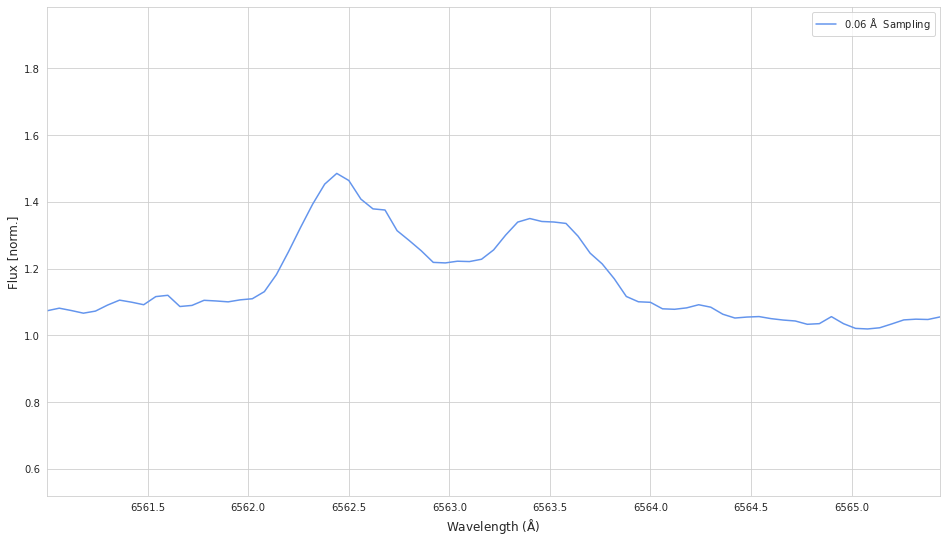

In [10]:
f, ax = plt.subplots(figsize=(16,9))
ax.plot(wl_grid[PLOT_MASK], df.loc[69,:][PLOT_MASK], color="cornflowerblue", lw=1.5, label=str(GRID_SIZE)+" $\mathrm{\AA}\ $ Sampling")
ax.set_xlabel("Wavelength ($\mathrm{\AA}$)", size=12)
ax.set_ylabel("Flux [norm.]", size=12)
ax.set_ylim((df.loc[69,:][PLOT_MASK].min()- 0.50),(df.loc[69,:][PLOT_MASK].max()+0.50))
ax.set_xlim(wl_grid[PLOT_MASK].min(), wl_grid[PLOT_MASK].max() )
ax.legend()
plt.show()